# OC&C Gym Membership

## 1. Abstract

The primary objective of the research is to analyse and improve the churn rate of the customers at OC&Gym. In order to accomplish this objective, an exploratory data analysis (EDA) is conducted to uncover key trends and actionable insights. This procedure includes computing descriptive statistics, feature engineering, and visualizing datasets. Additionally, cohort analysis was conducted using Python. The data was segmented based on various features to analyze customer behaviors of different segments and to observe patterns in the data that could be utilised for making recommendations to the customers. As expected, the result indicates that the churn rate has increased in response to OC&Gym's price hike across all subscription plans. The majority of churned customers were composed of the standard plan subscription members, which contradicts OC&Gym's initial hypothesis of competitor-driven churn. The reason is because if the hypothesis proves to be true, the majority of churned customers would most likely composed of flexible customers whose subscription price is now almost indifferent to the competitor's standard plan, creating a compelling reason for these flexible customers who have little to no switching costs to switch to a more premium brand. As a result, the research has concluded that the main potential root cause of churn could be attributed to OC&Gym's three-month notification rule for standard customers that requires them to provide three-month notice before leaving. In sum, the policy effectively forces these customers to stay, prohibiting them from unsubscribing, and by extension, having to pay for this newly increased price for three months before they can finally unsubscribe. Therefore, the recommendation to OC&Gym is to amend this policy as it is an unjust rule that punishes loyal standard customers and making it appear as the company is trying to take advantage of its customers, which could potentially impact the its brand image and profitability. Specifically, OC&Gym can keep the three-month notification rule. However, in the event of a price increase, the customers will not have to pay for this new price, but instead continue to pay an old rate, prior to the price hike, until the three-month period is over.

## 2. Introduction

The case study provides data for customer from OC&C gym where the information regarding the customers, and their visits to the gym were provided. Using this data, the team applied data analysis techniques in Python to draw insights to provide recommendations for increasing the revenue of OC&C gym.

## 3. Technologies and techniques

## 4. Results

## 5. Discussion

### How could OC&Gym improve their pricing strategy? 

1. Structured Tiering: On the basis of the facilities to use. Allowing different timings on the basis of the tier which the member is part of. Example, Bronze tier would be able to visit the gym in the non-peak hours of the gym, and 3 visits in peak hours.

The tiers would be:
- Bronze
- Silver
- Gold


2.Seasonal Pricing: As joiners are lower in the months of summer, offering discounted new joining prices would attract more members.

### What happened when the price was increased? 

Increasing the price led to a sharp fall in the number of members. 

TODO: Flexible members and Standard members comparison
      Age wise comparison
      Affluence comparison

### What does this suggest as possible options going forward? 

### In addition to price, what other factors influence whether a member is going to leave? 

### Bonus: Given this, to what degree can we predict individual member churn? 

### Key KPIs 

1. Customer Churn Rate
2. Population Demographics in each gym location
3. Feedback from customers
4. Peak and non-peak visitations 
5. Hours of visit

## 7. Appendix 

In [154]:
import matplotlib.pyplot as plt

#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
#from monthdelta import monthmod

In [155]:
df = pd.read_csv("subscriptionsdataFINAL.csv")
df.head()

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear
0,Enfield,Dec-11,C1,Male,Standard,Dec-11,1,1992
1,Greenwich,Jun-18,A,Female,Standard,NaN,2,1972
2,Islington,Mar-18,B,Female,Standard,Oct-18,3,1985
3,Hounslow,Oct-15,C1,Female,Standard,Dec-15,4,1972
4,Barnet,May-15,C2,Male,Standard,Dec-15,5,1982


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850033 entries, 0 to 850032
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Club               850033 non-null  object
 1   Join Date          850033 non-null  object
 2   Affluence          850033 non-null  object
 3   Gender             850033 non-null  object
 4   Subscription Type  850033 non-null  object
 5   End Date           797656 non-null  object
 6   CustomerID         850033 non-null  int64 
 7   BirthYear          850033 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 51.9+ MB


In [157]:
date_cols = ["Join Date", "End Date",]

def date_parser(x):
    try:
        ans = pd.datetime.strptime(str(x), '%b-%y')
    except ValueError:
        ans = pd.NaT
    return ans

df = pd.read_csv("subscriptionsdataFINAL.csv",
                parse_dates=date_cols,
                date_parser=date_parser
                ).replace(pd.NaT, np.nan).sort_values(by='End Date')

In [98]:
df

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear
539659,Hounslow,2009-05-01,A,Male,Flexible,2009-05-01,539660,1970
128370,Hounslow,2009-05-01,A,Female,Flexible,2009-05-01,128371,1981
120066,Hounslow,2009-05-01,C1,Female,Flexible,2009-05-01,120067,1972
602505,Hounslow,2009-05-01,C1,Male,Flexible,2009-05-01,602506,1983
707592,Hounslow,2009-05-01,C1,Female,Flexible,2009-05-01,707593,1976
...,...,...,...,...,...,...,...,...
849973,Hammersmith,2018-10-01,C1,Male,Standard,NaT,849974,1991
849981,Islington,2018-12-01,B,Male,Flexible,NaT,849982,1995
849983,Greenwich,2018-03-01,C1,Female,Standard,NaT,849984,1978
850020,Ealing,2018-08-01,C1,Male,Standard,NaT,850021,1982


### Number of people who leave after free month trial

In [72]:
count = 0
for i in range(0,len(df)):
    if df['Join Date'][i] == df['End Date'][i]:
        count +=1
print("Number of customers who left after first month: {}".format(count))

Number of customers who left after first month: 46798


### Verifying if there are any customers who ended their membership and then rejoined later.

Assuming that when a customer rejoins the gym, their Customer ID would remain the same.

In [73]:
len(set(df['CustomerID'])) == df.shape[0]

True

### Age of the Customers when they joined the gym

In [104]:
df['Age'] =  df['Join Date'].dt.year - df['BirthYear']
df.head()

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,Membership Length,Age
539659,Hounslow,2009-05-01,A,Male,Flexible,2009-05-01,539660,1970,0 days,39
128370,Hounslow,2009-05-01,A,Female,Flexible,2009-05-01,128371,1981,0 days,28
120066,Hounslow,2009-05-01,C1,Female,Flexible,2009-05-01,120067,1972,0 days,37
602505,Hounslow,2009-05-01,C1,Male,Flexible,2009-05-01,602506,1983,0 days,26
707592,Hounslow,2009-05-01,C1,Female,Flexible,2009-05-01,707593,1976,0 days,33


In [105]:
df['Membership Length'] = (df["End Date"] - df["Join Date"])//30
df

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,Membership Length,Age
539659,Hounslow,2009-05-01,A,Male,Flexible,2009-05-01,539660,1970,0 days,39
128370,Hounslow,2009-05-01,A,Female,Flexible,2009-05-01,128371,1981,0 days,28
120066,Hounslow,2009-05-01,C1,Female,Flexible,2009-05-01,120067,1972,0 days,37
602505,Hounslow,2009-05-01,C1,Male,Flexible,2009-05-01,602506,1983,0 days,26
707592,Hounslow,2009-05-01,C1,Female,Flexible,2009-05-01,707593,1976,0 days,33
...,...,...,...,...,...,...,...,...,...,...
849973,Hammersmith,2018-10-01,C1,Male,Standard,NaT,849974,1991,NaT,27
849981,Islington,2018-12-01,B,Male,Flexible,NaT,849982,1995,NaT,23
849983,Greenwich,2018-03-01,C1,Female,Standard,NaT,849984,1978,NaT,40
850020,Ealing,2018-08-01,C1,Male,Standard,NaT,850021,1982,NaT,36


In [106]:
ages = (df[["CustomerID", "Age"]].groupby("Age").count() / len(df)).rename(columns={"CustomerID":"count"})
ages

,count
Age,
18,0.014221
19,0.023807
20,0.029031
21,0.031596
22,0.032876
23,0.038978
24,0.041727
25,0.044755
26,0.045863


### Number of Active Members

In [77]:
print("Number of Active Members: {}".format(df.isnull().sum()['End Date']))
print("Number of Inactive Members: {}".format(df.shape[0] - df.isnull().sum()['End Date']))

Number of Active Members: 52377
Number of Inactive Members: 797656


### Affluent Breakdown

In [78]:
affluence = (df[["CustomerID", "Affluence"]].groupby("Affluence").count() / len(df)).rename(columns={"CustomerID":"count"})

In [79]:
affluence

,count
Affluence,
A,0.168963
B,0.431667
C1,0.274486
C2,0.111062
DE,0.013823


Category B has the highest joiners. 

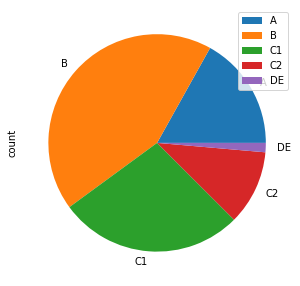

In [107]:
plot = affluence.plot.pie(y='count', figsize=(5, 5))

### Breakdown of Members who left

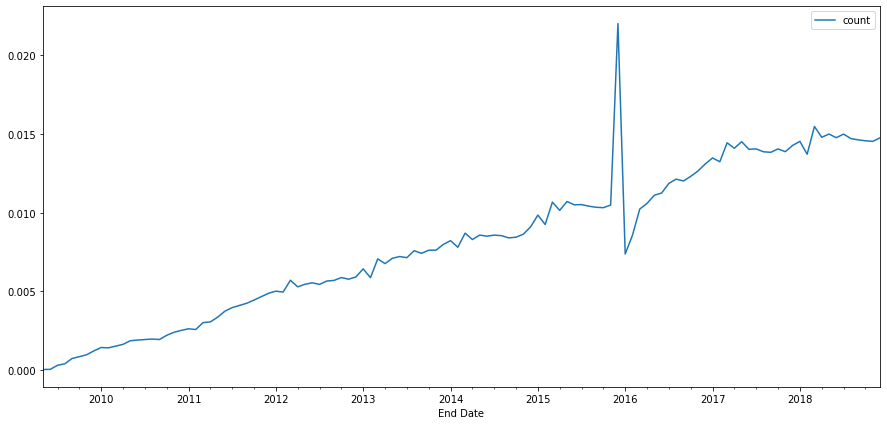

In [139]:
survive = (df[["CustomerID", "End Date"]].groupby("End Date").count() / len(df)).rename(columns={"CustomerID":"count"})
fig, ax = plt.subplots(figsize=(15,7))
survive.plot(ax=ax)

### Break down of New Joiners

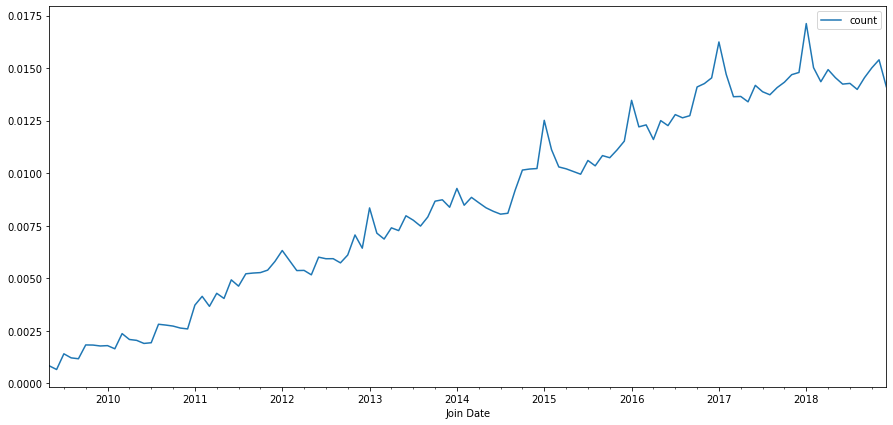

In [140]:
joining = (df[["CustomerID", "Join Date"]].groupby("Join Date").count() / len(df)).rename(columns={"CustomerID":"count"})
fig, ax = plt.subplots(figsize=(15,7))
joining.plot(ax=ax)

## 2009-2010

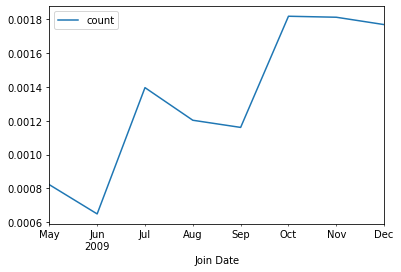

In [147]:
joining_09 = joining[0:8]
joining_09.plot()

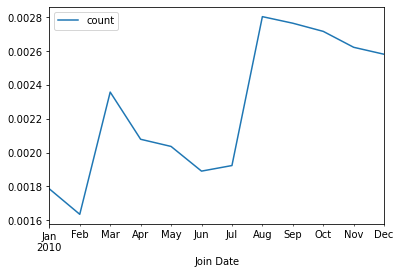

In [148]:
joining_10 = joining[8:20]
joining_10.plot()

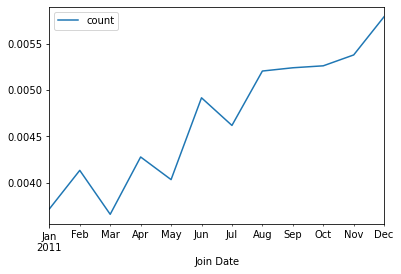

In [149]:
joining_10 = joining[20:32]
joining_10.plot()

In [113]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Join Date','type']).count()['amount'].plot(ax=ax)

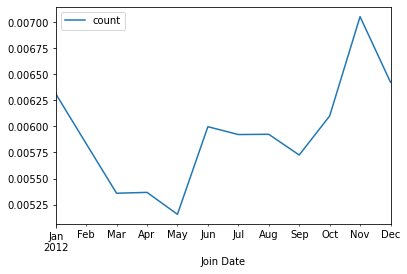

In [150]:
joining_10 = joining[32:44]
joining_10.plot()

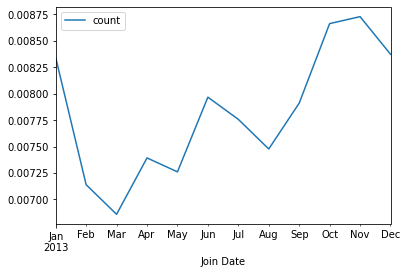

In [151]:
joining_10 = joining[44:56]
joining_10.plot()

Finding the month of joining date. Fall time more joiners compared to Summer? Maybe recommend more advertisements in summer or providing season based offers?

In [141]:
subscription = (df[["CustomerID", "Subscription Type"]].groupby("Subscription Type").count() / len(df)).rename(columns={"CustomerID":"count"})

In [142]:
subscription

,count
Subscription Type,
Flexible,0.216529
Standard,0.783471


## Visitdation Data Analysis

In [91]:
df_visit1 = pd.read_csv('visitationdataPART1.csv', header = 0, error_bad_lines=False, delimiter = ',')
df_visit2 = pd.read_csv('visitationdataPART2.csv', header = 0, error_bad_lines=False, delimiter = ',')
df_visitation = pd.concat([df_visit1,df_visit2])

merged = pd.merge(df, df_visitation, on='CustomerID')
del df_visit1, df_visit2, df_visitation

merged['CustomerID'] = merged['CustomerID'].astype('int32')

merged['HourofVisit'] = merged['TimeofVisit'].apply(lambda x: int(x[0:2])).replace(0,24)
merged.head()

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,Age,Membership Length,visitdate,TimeofVisit,peakvisits,HourofVisit
0,Hounslow,2009-05-01,A,Male,Flexible,2009-05-01,539660,1970,39,0 days,2009-05-01,21:45,False,21
1,Hounslow,2009-05-01,A,Male,Flexible,2009-05-01,539660,1970,39,0 days,2009-05-02,19:15,True,19
2,Hounslow,2009-05-01,A,Male,Flexible,2009-05-01,539660,1970,39,0 days,2009-05-03,19:15,True,19
3,Hounslow,2009-05-01,A,Male,Flexible,2009-05-01,539660,1970,39,0 days,2009-05-04,18:45,True,18
4,Hounslow,2009-05-01,A,Male,Flexible,2009-05-01,539660,1970,39,0 days,2009-05-06,18:30,True,18


In [143]:
hour_table = merged[['HourofVisit','Club','CustomerID']].groupby(['HourofVisit','Club']).count().fillna('0.0').astype(float).rename(columns={"CustomerID":"count"})
hour_table = hour_table.reset_index()
hour_table

,HourofVisit,Club,count
0,5,Barking,11520.0
1,5,Barnet,27392.0
2,5,Bexley,11829.0
3,5,Brent,14504.0
4,5,Bromley,9342.0
...,...,...,...
635,24,Sutton,3109.0
636,24,Tower Hamlets,4141.0
637,24,Waltham Forest,3606.0
638,24,Wandsworth,3334.0


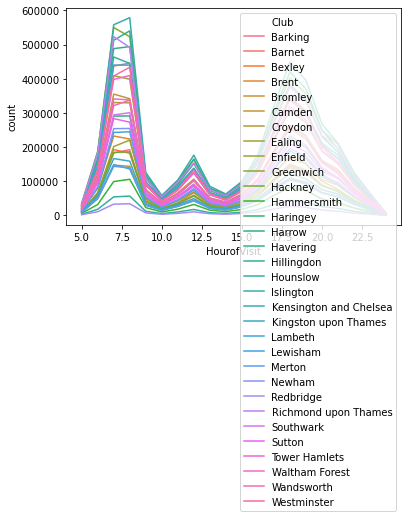

In [94]:
sns.lineplot(x='HourofVisit', y='count', hue='Club', data=hour_table)

In [100]:
visiting = merged[['HourofVisit','Club','CustomerID']].groupby(['HourofVisit','Club']).agg(['sum'])

In [101]:
visiting

CustomerID
                                     sum
HourofVisit Club                        
5           Barking         4.978226e+09
            Barnet          1.170195e+10
            Bexley          4.997076e+09
            Brent           6.186592e+09
            Bromley         3.977048e+09
...                                  ...
24          Sutton          1.307123e+09
            Tower Hamlets   1.724140e+09
            Waltham Forest  1.520741e+09
            Wandsworth      1.422867e+09
            Westminster     1.710472e+09

[640 rows x 1 columns]

#TODO: Peak times and recommendations, Which gym has low memberships - find another location?, What times have low volumes - reduce capacity of staff at those times?